In [37]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

In [42]:
results = pd.read_csv('first_test.csv', delimiter=',', header=None, names=['ranker', 'day', 'domain', 'precision'])
domains = results['domain']
domains = domains.unique()
rankers = results['ranker']
rankers = rankers.unique()

In [22]:
results

,ranker,day,domain,precision
0,contentrank,1,3336,0.000000
1,contentrank,1,418,0.001268
2,contentrank,1,2522,0.000000
3,contentrank,1,35774,0.105243
4,contentrank,1,694,0.000000
5,contentrank,1,1677,0.013124
6,contentrank,1,13554,0.000000
7,contentrank,2,3336,0.000000
8,contentrank,2,418,0.008484
9,contentrank,2,2522,0.000000


In [27]:
results.query('ranker == "contentrank" & domain == 35774')

,ranker,day,domain,precision
3,contentrank,1,35774,0.105243
10,contentrank,2,35774,0.137934
17,contentrank,3,35774,0.184409


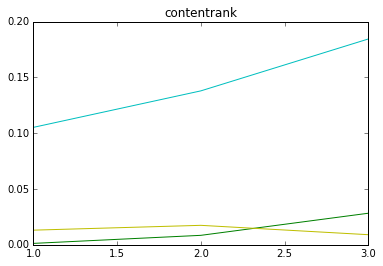

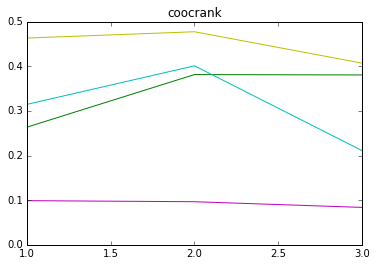

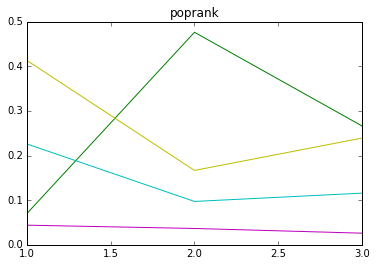

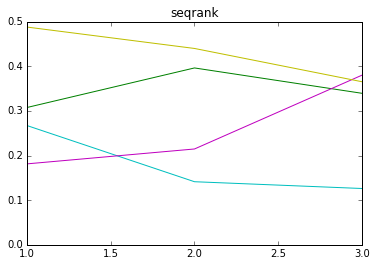

In [45]:
for ranker in rankers:
    plt.figure()
    plt.title(ranker)
    for domain in domains:
        subresults = results.query('ranker == "%s" & domain == %s' % (ranker,domain))
        days = subresults['day']
        precision = subresults['precision']
        plt.plot(days, precision)